<a href="https://colab.research.google.com/github/talw98/3D-Cephalometric-Landmark-Detection-Using-Convolutional-Neural-Networks/blob/main/DATA_PREP_%26_VISUALISATION_CASE_RS_%26_CASE_WM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**1. DATA PREPARATION/VISUALISATION**

##CASE RS






In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import zipfile

# Path to the zip file in Google Drive
zip_path = '/content/drive/My Drive/CT_Daten.zip'

# Specify the extraction path
extract_path = '/content/CT_Daten'

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Verify the extracted folder content
!ls /content/CT_Daten

'Case RS'  'Case WM'


In [ ]:
# List contents of IMAGES folder in Case RS
!ls /content/CT_Daten/Case\ RS/2023-08-24-001/IMAGES


IM00001  IM00105  IM00209  IM00313  IM00417  IM00521  IM00625  IM00729	IM00833  IM00937  IM01041
IM00002  IM00106  IM00210  IM00314  IM00418  IM00522  IM00626  IM00730	IM00834  IM00938  IM01042
IM00003  IM00107  IM00211  IM00315  IM00419  IM00523  IM00627  IM00731	IM00835  IM00939  IM01043
IM00004  IM00108  IM00212  IM00316  IM00420  IM00524  IM00628  IM00732	IM00836  IM00940  IM01044
IM00005  IM00109  IM00213  IM00317  IM00421  IM00525  IM00629  IM00733	IM00837  IM00941  IM01045
IM00006  IM00110  IM00214  IM00318  IM00422  IM00526  IM00630  IM00734	IM00838  IM00942  IM01046
IM00007  IM00111  IM00215  IM00319  IM00423  IM00527  IM00631  IM00735	IM00839  IM00943  IM01047
IM00008  IM00112  IM00216  IM00320  IM00424  IM00528  IM00632  IM00736	IM00840  IM00944  IM01048
IM00009  IM00113  IM00217  IM00321  IM00425  IM00529  IM00633  IM00737	IM00841  IM00945  IM01049
IM00010  IM00114  IM00218  IM00322  IM00426  IM00530  IM00634  IM00738	IM00842  IM00946  IM01050
IM00011  IM00115  IM00219  IM0

In [ ]:
!pip install pydicom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 21.9 MB/s eta 0:00:00


In [ ]:
# List contents of IMAGES folder in Case RS
!ls /content/CT_Daten/Case\ RS/2023-08-24-001

DICOMDIR  IMAGES


In [ ]:
# List contents of IMAGES folder in Case RS
!ls /content/CT_Daten/Case\ RS/2023-08-24-001/DICOMDIR

'/content/CT_Daten/Case RS/2023-08-24-001/DICOMDIR'


In [ ]:
import pydicom

# Path to the DICOMDIR file
dicomdir_path = '/content/CT_Daten/Case RS/2023-08-24-001/DICOMDIR'

# Loading the DICOMDIR file
dicomdir = pydicom.dcmread(dicomdir_path)

# Print the structure of the DICOMDIR file
print(dicomdir)


Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 194
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: Media Storage Directory Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.2.276.0.45.1.7.4.929342982293.23082415220500001.11292
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.276.0.45.1.1.0.71.20130122
(0002,0013) Implementation Version Name         SH: 'DicomWeb_71'
-------------------------------------------------
(0004,1130) File-set ID                         CS: 'VISAGECS_MEDIA'
(0004,1200) Offset of the First Directory Recor UL: 404
(0004,1202) Offset of the Last Directory Record UL: 404
(0004,1212) File-set Consistency Flag           US: 0
(0004,1220)  Directory Record Sequence  1161 item(s) ---- 
   (0004,1400) Offset of the Next Directory Record UL: 0
   (0004,1

In [ ]:
#IMAGE PATHS
if hasattr(dicomdir, 'DirectoryRecordSequence'):
    for record in dicomdir.DirectoryRecordSequence:
        if record.DirectoryRecordType == "PATIENT":
            print(f"Patient ID: {record.PatientID}")

        elif record.DirectoryRecordType == "STUDY":
            print(f"  Study Date: {record.StudyDate}, Study Time: {record.StudyTime}")

        elif record.DirectoryRecordType == "SERIES":
            print(f"    Series Number: {record.SeriesNumber}")

        elif record.DirectoryRecordType == "IMAGE":
            # Get the referenced file (image)
            image_file = record.ReferencedFileID
            image_path = f'/content/CT_Daten/Case RS/2023-08-24-001/IMAGES/{image_file}'
            print(f"      Image Path: {image_path}")


Patient ID: 2f28988d
  Study Date: 20220323, Study Time: 150818
    Series Number: 1
      Image Path: /content/CT_Daten/Case RS/2023-08-24-001/IMAGES/['IMAGES', 'IM00001']
      Image Path: /content/CT_Daten/Case RS/2023-08-24-001/IMAGES/['IMAGES', 'IM00002']
    Series Number: 301
      Image Path: /content/CT_Daten/Case RS/2023-08-24-001/IMAGES/['IMAGES', 'IM00003']
      Image Path: /content/CT_Daten/Case RS/2023-08-24-001/IMAGES/['IMAGES', 'IM00004']
      Image Path: /content/CT_Daten/Case RS/2023-08-24-001/IMAGES/['IMAGES', 'IM00005']
      Image Path: /content/CT_Daten/Case RS/2023-08-24-001/IMAGES/['IMAGES', 'IM00006']
      Image Path: /content/CT_Daten/Case RS/2023-08-24-001/IMAGES/['IMAGES', 'IM00007']
      Image Path: /content/CT_Daten/Case RS/2023-08-24-001/IMAGES/['IMAGES', 'IM00008']
      Image Path: /content/CT_Daten/Case RS/2023-08-24-001/IMAGES/['IMAGES', 'IM00009']
      Image Path: /content/CT_Daten/Case RS/2023-08-24-001/IMAGES/['IMAGES', 'IM00010']
      Image 

In [ ]:
import os

# Path to Case RS images
image_folder_rs = '/content/CT_Daten/Case RS/2023-08-24-001/IMAGES/'

# List all files in the IMAGES folder
file_list = os.listdir(image_folder_rs)

# Print out the files
print(file_list)


['IM00590', 'IM00159', 'IM01032', 'IM00315', 'IM00193', 'IM00660', 'IM00863', 'IM00776', 'IM00607', 'IM00780', 'IM00194', 'IM00871', 'IM00085', 'IM00049', 'IM00088', 'IM00453', 'IM00668', 'IM00016', 'IM00321', 'IM00635', 'IM00765', 'IM00811', 'IM00191', 'IM01016', 'IM00699', 'IM00460', 'IM00425', 'IM01119', 'IM00420', 'IM00882', 'IM00854', 'IM00329', 'IM00227', 'IM01072', 'IM00405', 'IM00736', 'IM01033', 'IM00772', 'IM00942', 'IM00504', 'IM00498', 'IM00746', 'IM00101', 'IM00879', 'IM01111', 'IM00837', 'IM00540', 'IM00141', 'IM01057', 'IM00361', 'IM00371', 'IM00138', 'IM00487', 'IM00197', 'IM00307', 'IM00797', 'IM00672', 'IM00215', 'IM01020', 'IM00855', 'IM00156', 'IM00216', 'IM00099', 'IM00244', 'IM00940', 'IM00593', 'IM00623', 'IM00792', 'IM00779', 'IM00483', 'IM00402', 'IM01065', 'IM00862', 'IM00588', 'IM00507', 'IM00894', 'IM00541', 'IM00564', 'IM00845', 'IM00762', 'IM00759', 'IM00620', 'IM01053', 'IM00920', 'IM01104', 'IM01080', 'IM01061', 'IM00929', 'IM00898', 'IM00678', 'IM00239'

In [ ]:
!pip install pylibjpeg>=2.0 pylibjpeg-libjpeg>=2.1 pylibjpeg-openjpeg


In [ ]:
!apt-get install -y python3-gdcm>=3.0.10


In [ ]:
import pydicom

# Path to one of the DICOM files in the series
dicom_file_path = "/content/CT_Daten/Case RS/2023-08-24-001/IMAGES/IM00794"
# Load the DICOM file
ds = pydicom.dcmread(dicom_file_path)

# Extract the necessary metadata
image_orientation_patient = ds.ImageOrientationPatient
image_position_patient = ds.ImagePositionPatient
pixel_spacing = ds.PixelSpacing
slice_thickness = ds.SliceThickness

# Print the extracted information
print("Image Orientation (Patient):", image_orientation_patient)
print("Image Position (Patient):", image_position_patient)
print("Pixel Spacing:", pixel_spacing)
print("Slice Thickness:", slice_thickness)


Image Orientation (Patient): [0.9999997616, -2.785067954e-05, 0.0006491739769, -2.781692092e-05, 0.9963394403, 0.08548483998]
Image Position (Patient): [-122.4852829, -127.9250031, -98.18783569]
Pixel Spacing: [0.4414060116, 0.4414060116]
Slice Thickness: 2


In [ ]:
import matplotlib.pyplot as plt

# Load the DICOM file again
dicom_file_rs = '/content/CT_Daten/Case RS/2023-08-24-001/IMAGES/IM00794'  # Update the path if needed
dicom_data_rs = pydicom.dcmread(dicom_file_rs)

# Visualize the DICOM slice
plt.imshow(dicom_data_rs.pixel_array, cmap='gray')
plt.title('DICOM Image - Case RS')
plt.show()


RuntimeError: Unable to decompress 'JPEG Lossless, Non-Hierarchical, First-Order Prediction (Process 14 [Selection Value 1])' pixel data because all plugins are missing dependencies:
	gdcm - requires gdcm>=3.0.10
	pylibjpeg - requires pylibjpeg>=2.0 and pylibjpeg-libjpeg>=2.1

In [ ]:
!apt-get install -y dcm2niix


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libyaml-cpp0.7 pigz
The following NEW packages will be installed:
  dcm2niix libyaml-cpp0.7 pigz
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 417 kB of archives.
After this operation, 1,393 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 pigz amd64 2.6-1 [63.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libyaml-cpp0.7 amd64 0.7.0+dfsg-8build1 [97.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 dcm2niix amd64 1.0.20211006-1build1 [256 kB]
Fetched 417 kB in 0s (1,369 kB/s)
Selecting previously unselected package pigz.
(Reading database ... 123635 files and directories currently installed.)
Preparing to unpack .../archives/pigz_2.6-1_amd64.deb ...
Unpacking pigz (2.6-1) ...
Selecting previously unselected package libyaml-c

In [ ]:
# Create the output folder for RS Converted files
!mkdir -p /content/CT_Daten/Case_RS_Converted


In [ ]:
#Run the dcm2niix command
dicom_folder_rs = '/content/CT_Daten/Case\ RS/2023-08-24-001/IMAGES'
output_folder = '/content/CT_Daten/Case_RS_Converted'

!dcm2niix -o $output_folder -z y $dicom_folder_rs


Chris Rorden's dcm2niiX version v1.0.20211006  (JP2:OpenJPEG) GCC11.2.0 x86-64 (64-bit Linux)
Found 1141 DICOM file(s)
Image Decompression is new: please validate conversions
Convert 297 DICOM as /content/CT_Daten/Case_RS_Converted/IMAGES_2.4_NNH_+_Kiefer_NNH_metall_(helical)_Strecke_160mm_20220323150818_301 (512x512x297x1)
Compress: "/usr/bin/pigz" -b 960 -n -f -6 "/content/CT_Daten/Case_RS_Converted/IMAGES_2.4_NNH_+_Kiefer_NNH_metall_(helical)_Strecke_160mm_20220323150818_301.nii"
Convert 297 DICOM as /content/CT_Daten/Case_RS_Converted/IMAGES_2.4_NNH_+_Kiefer_NNH_metall_(helical)_Strecke_160mm_20220323150818_2 (512x512x297x1)
Compress: "/usr/bin/pigz" -b 960 -n -f -6 "/content/CT_Daten/Case_RS_Converted/IMAGES_2.4_NNH_+_Kiefer_NNH_metall_(helical)_Strecke_160mm_20220323150818_2.nii"
Unable to determine spatial orientation: 0020,0037 missing (probably not a problem: derived image)
Convert 30 DICOM as /content/CT_Daten/Case_RS_Converted/IMAGES_2.4_NNH_+_Kiefer_NNH_metall_(helical)_Str

In [ ]:
# Correcting the paths and adding the necessary flags for gantry tilt correction
dicom_folder_rs = '/content/CT_Daten/Case RS/2023-08-24-001/IMAGES'
output_folder = '/content/CT_Daten/Case_RS_Converted'

# Running the command with gantry tilt correction (-t y)
!dcm2niix -o "$output_folder" -z y -t y "$dicom_folder_rs"


Chris Rorden's dcm2niiX version v1.0.20211006  (JP2:OpenJPEG) GCC11.2.0 x86-64 (64-bit Linux)
Found 1141 DICOM file(s)
Image Decompression is new: please validate conversions
Convert 297 DICOM as /content/CT_Daten/Case_RS_Converted/IMAGES_2.4_NNH_+_Kiefer_NNH_metall_(helical)_Strecke_160mm_20220323150818_301a (512x512x297x1)
Compress: "/usr/bin/pigz" -b 960 -n -f -6 "/content/CT_Daten/Case_RS_Converted/IMAGES_2.4_NNH_+_Kiefer_NNH_metall_(helical)_Strecke_160mm_20220323150818_301a.nii"
Convert 297 DICOM as /content/CT_Daten/Case_RS_Converted/IMAGES_2.4_NNH_+_Kiefer_NNH_metall_(helical)_Strecke_160mm_20220323150818_2a (512x512x297x1)
Compress: "/usr/bin/pigz" -b 960 -n -f -6 "/content/CT_Daten/Case_RS_Converted/IMAGES_2.4_NNH_+_Kiefer_NNH_metall_(helical)_Strecke_160mm_20220323150818_2a.nii"
Unable to determine spatial orientation: 0020,0037 missing (probably not a problem: derived image)
Convert 30 DICOM as /content/CT_Daten/Case_RS_Converted/IMAGES_2.4_NNH_+_Kiefer_NNH_metall_(helical)

In [ ]:
!dcm2niix -o "$output_folder" -z y -t y -i y -m y "$dicom_folder_rs"


Chris Rorden's dcm2niiX version v1.0.20211006  (JP2:OpenJPEG) GCC11.2.0 x86-64 (64-bit Linux)
Found 1141 DICOM file(s)
Image Decompression is new: please validate conversions
Convert 297 DICOM as /content/CT_Daten/Case_RS_Converted/IMAGES_2.4_NNH_+_Kiefer_NNH_metall_(helical)_Strecke_160mm_20220323150818_301b (512x512x297x1)
Compress: "/usr/bin/pigz" -b 960 -n -f -6 "/content/CT_Daten/Case_RS_Converted/IMAGES_2.4_NNH_+_Kiefer_NNH_metall_(helical)_Strecke_160mm_20220323150818_301b.nii"
Convert 297 DICOM as /content/CT_Daten/Case_RS_Converted/IMAGES_2.4_NNH_+_Kiefer_NNH_metall_(helical)_Strecke_160mm_20220323150818_2b (512x512x297x1)
Compress: "/usr/bin/pigz" -b 960 -n -f -6 "/content/CT_Daten/Case_RS_Converted/IMAGES_2.4_NNH_+_Kiefer_NNH_metall_(helical)_Strecke_160mm_20220323150818_2b.nii"
Ignoring derived image(s) of series 308 /content/CT_Daten/Case RS/2023-08-24-001/IMAGES/IM00599
Gantry Tilt based on 0018,1120 0, estimated from slice vector -117.737
Ignoring derived image(s) of ser

- **Data Format**: The dataset consisted of DICOM files, which were converted to NIfTI format for easier handling and 3D visualization, as NIfTI simplifies 3D volumetric data processing and visualization compared to DICOM.
  
- **Gantry Tilt**: Different tilt angles for images (-117.737°, 117.186°) created inconsistencies in slice alignment, complicating stacking and spatial reconstruction.

- **Spatial Orientation Missing (0020,0037)**: Missing spatial orientation tags led to difficulties in determining the correct slice order and direction, resulting in possible image misalignment or flipping.

- **Inconsistent Slice Distances**: Variation in interslice distances caused issues in the NIfTI conversion, as the format expects regular spacing between slices, making accurate 3D reconstruction challenging.

- **Bogus Spatial Matrix**: The logs indicated an invalid spatial matrix for some images, leading to issues with encoding the spatial relationships between slices.

- **Compression and Lossy Format**: The images were compressed using JPEG Lossless encoding, which required decompression, adding complexity and potential errors during processing.

- **Partial File Conversion**: Only 803 of 1141 DICOM files were successfully converted, leaving gaps in the data and potentially affecting the completeness of the 3D volume.

- **Flipping Issues**: Warnings about possible slice flipping arose due to missing spatial orientation data, leading to potential misalignment when plotting or reconstructing the images.

In [ ]:


# Directory where the NIfTI files are stored
nifti_dir = '/content/CT_Daten/Case_RS_Converted/'

# Function to find all NIfTI files in the directory
def find_nifti_files(directory):
    nifti_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".nii") or file.endswith(".nii.gz"):
                nifti_files.append(os.path.join(root, file))
    return nifti_files

# List all NIfTI files in the directory
nifti_files = find_nifti_files(nifti_dir)

# Display the found NIfTI files
for i, file in enumerate(nifti_files, 1):
    print(f"{i}: {file}")


1: /content/CT_Daten/Case_RS_Converted/IMAGES_2.4_NNH_+_Kiefer_NNH_metall_(helical)_Strecke_160mm_20220323150818_1b.nii.gz
2: /content/CT_Daten/Case_RS_Converted/IMAGES_2.4_NNH_+_Kiefer_NNH_metall_(helical)_Strecke_160mm_20220323150818_1c.nii.gz
3: /content/CT_Daten/Case_RS_Converted/IMAGES_2.4_NNH_+_Kiefer_NNH_metall_(helical)_Strecke_160mm_20220323150818_202a.nii.gz
4: /content/CT_Daten/Case_RS_Converted/IMAGES_2.4_NNH_+_Kiefer_NNH_metall_(helical)_Strecke_160mm_20220323150818_307a_Tilt_Eq_1.nii.gz
5: /content/CT_Daten/Case_RS_Converted/IMAGES_2.4_NNH_+_Kiefer_NNH_metall_(helical)_Strecke_160mm_20220323150818_201.nii.gz
6: /content/CT_Daten/Case_RS_Converted/IMAGES_2.4_NNH_+_Kiefer_NNH_metall_(helical)_Strecke_160mm_20220323150818_305a.nii.gz
7: /content/CT_Daten/Case_RS_Converted/IMAGES_2.4_NNH_+_Kiefer_NNH_metall_(helical)_Strecke_160mm_20220323150818_305.nii.gz
8: /content/CT_Daten/Case_RS_Converted/IMAGES_2.4_NNH_+_Kiefer_NNH_metall_(helical)_Strecke_160mm_20220323150818_2a.nii.g

Shape of the NIfTI image: (512, 512, 297)


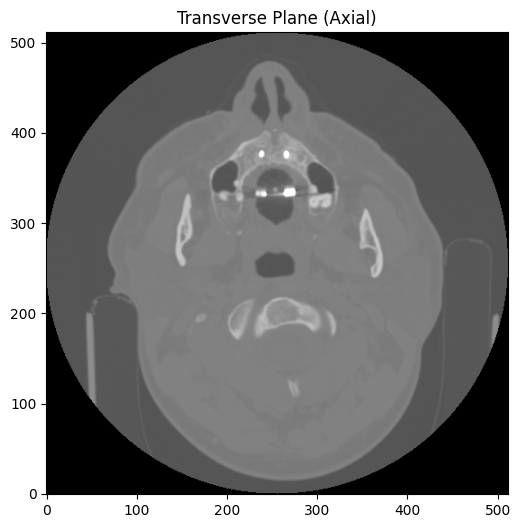

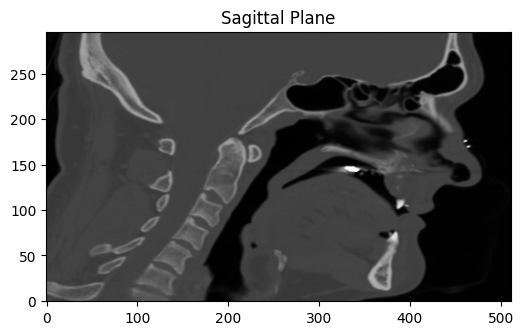

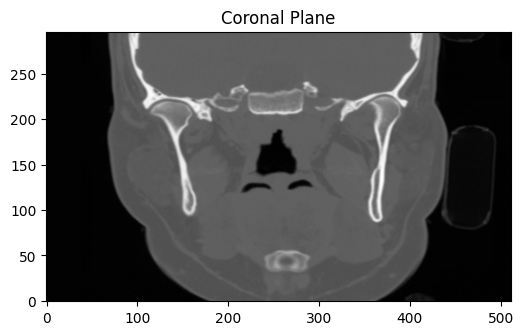

In [ ]:
import nibabel as nib

# Load the NIfTI image
nifti_file = '/content/CT_Daten/Case_RS_Converted/IMAGES_2.4_NNH_+_Kiefer_NNH_metall_(helical)_Strecke_160mm_20220323150818_301b.nii.gz'
nifti_img = nib.load(nifti_file)

# Get the image data as a numpy array
nifti_data = nifti_img.get_fdata()

# Check the shape of the data
print(f"Shape of the NIfTI image: {nifti_data.shape}")

# Plot the middle slice in the transverse plane (Z-axis)
transverse_mid_idx = nifti_data.shape[2] // 2
transverse_slice = nifti_data[:, :, transverse_mid_idx]

plt.figure(figsize=(6, 6))
plt.imshow(transverse_slice.T, cmap='gray', origin='lower')
plt.title('Transverse Plane (Axial)')
plt.show()

# Plot the middle slice in the sagittal plane (X-axis)
sagittal_mid_idx = nifti_data.shape[0] // 2
sagittal_slice = nifti_data[sagittal_mid_idx, :, :]

plt.figure(figsize=(6, 6))
plt.imshow(sagittal_slice.T, cmap='gray', origin='lower')
plt.title('Sagittal Plane')
plt.show()

# Plot the middle slice in the coronal plane (Y-axis)
coronal_mid_idx = nifti_data.shape[1] // 2
coronal_slice = nifti_data[:, coronal_mid_idx, :]

plt.figure(figsize=(6, 6))
plt.imshow(coronal_slice.T, cmap='gray', origin='lower')
plt.title('Coronal Plane')
plt.show()


The NIfTI volume has a shape of 512 x 512 x 297, representing the pixel
resolution in the X, Y planes (512 x 512 pixels) and 297 slices along the Z-axis (depth).

The X and Y dimensions define the width and height of each 2D slice, while the 297 slices make up the full 3D volume.





#CASE WM

In [ ]:
# List contents of IMAGES folder in Case WM
!ls /content/CT_Daten/Case\ WM/2023-08-24-002

DICOMDIR  IMAGES


In [ ]:

# Define the path to the IMAGES folder in Case WM
case_wm_images_path = '/content/CT_Daten/Case WM/2023-08-24-002/IMAGES'

# List the contents of the folder
print(os.listdir(case_wm_images_path))


['IM00590', 'IM01248', 'IM00159', 'IM01032', 'IM00315', 'IM00193', 'IM00660', 'IM00863', 'IM00776', 'IM00607', 'IM00780', 'IM00194', 'IM00871', 'IM00085', 'IM00049', 'IM01172', 'IM00088', 'IM00453', 'IM00668', 'IM00016', 'IM00321', 'IM00635', 'IM00765', 'IM00811', 'IM00191', 'IM01016', 'IM00699', 'IM00460', 'IM00425', 'IM01119', 'IM00420', 'IM00882', 'IM00854', 'IM00329', 'IM00227', 'IM01072', 'IM00405', 'IM01176', 'IM00736', 'IM01199', 'IM01033', 'IM00772', 'IM00942', 'IM00504', 'IM00498', 'IM00746', 'IM00101', 'IM01226', 'IM00879', 'IM01111', 'IM01215', 'IM00837', 'IM00540', 'IM00141', 'IM01057', 'IM00361', 'IM00371', 'IM00138', 'IM00487', 'IM00197', 'IM00307', 'IM01204', 'IM00797', 'IM00672', 'IM00215', 'IM01020', 'IM00855', 'IM00156', 'IM00216', 'IM00099', 'IM00244', 'IM00940', 'IM00593', 'IM00623', 'IM00792', 'IM00779', 'IM00483', 'IM00402', 'IM01065', 'IM00862', 'IM00588', 'IM00507', 'IM00894', 'IM00541', 'IM01253', 'IM00564', 'IM01213', 'IM00845', 'IM00762', 'IM00759', 'IM00620'

In [ ]:
# Path to the DICOMDIR file
dicomdir_path = '/content/CT_Daten/Case WM/2023-08-24-002/DICOMDIR'

# Load the DICOMDIR file
dicomdir_WM= pydicom.dcmread(dicomdir_path)

# Print the structure of the DICOMDIR file
print(dicomdir_WM)


Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 194
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: Media Storage Directory Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.2.276.0.45.1.7.4.929342982293.23082415264900002.11292
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.276.0.45.1.1.0.71.20130122
(0002,0013) Implementation Version Name         SH: 'DicomWeb_71'
-------------------------------------------------
(0004,1130) File-set ID                         CS: 'VISAGECS_MEDIA'
(0004,1200) Offset of the First Directory Recor UL: 404
(0004,1202) Offset of the Last Directory Record UL: 404
(0004,1212) File-set Consistency Flag           US: 0
(0004,1220)  Directory Record Sequence  1291 item(s) ---- 
   (0004,1400) Offset of the Next Directory Record UL: 0
   (0004,1

In [ ]:
# Path to one of the DICOM files in the series
dicom_file_path = "/content/CT_Daten/Case WM/2023-08-24-002/IMAGES/IM00794"

# Load the DICOM file
ds = pydicom.dcmread(dicom_file_path)

# Extract the necessary metadata
image_orientation_patient = ds.ImageOrientationPatient  # (0020,0037)
image_position_patient = ds.ImagePositionPatient        # (0020,0032)
pixel_spacing = ds.PixelSpacing                         # (0028,0030)
slice_thickness = ds.SliceThickness                     # (0018,0050)

print("Image Orientation (Patient):", image_orientation_patient)
print("Image Position (Patient):", image_position_patient)
print("Pixel Spacing:", pixel_spacing)
print("Slice Thickness:", slice_thickness)

Image Orientation (Patient): [-0.050211858, 0.9987385869, 0, 0, 0, -1]
Image Position (Patient): [-16.94798279, -136.8547974, 81.70368958]
Pixel Spacing: [0.4492187202, 0.4492187202]
Slice Thickness: 2


In [ ]:
# Create the output directory before conversion, to store converted WM Case files
!mkdir -p /content/CT_Daten/Case_WM_Converted


In [ ]:
# Convert the DICOM files from Case WM to NIfTI format
!dcm2niix -o /content/CT_Daten/Case_WM_Converted -z y /content/CT_Daten/Case\ WM/2023-08-24-002/IMAGES


Chris Rorden's dcm2niiX version v1.0.20211006  (JP2:OpenJPEG) GCC11.2.0 x86-64 (64-bit Linux)
Found 1273 DICOM file(s)
Image Decompression is new: please validate conversions
Unable to determine spatial orientation: 0020,0037 missing (probably not a problem: derived image)
Convert 40 DICOM as /content/CT_Daten/Case_WM_Converted/IMAGES_2.5_KIEFER_NNH_KNOCHERN_X_20190117083738_401 (512x512x40x1)
Compress: "/usr/bin/pigz" -b 960 -n -f -6 "/content/CT_Daten/Case_WM_Converted/IMAGES_2.5_KIEFER_NNH_KNOCHERN_X_20190117083738_401.nii"
Gantry Tilt based on 0018,1120 0, estimated from slice vector -61.7518
Convert 110 DICOM as /content/CT_Daten/Case_WM_Converted/IMAGES_2.5_KIEFER_NNH_KNOCHERN_X_20190117083738_202 (512x512x110x1)
Compress: "/usr/bin/pigz" -b 960 -n -f -6 "/content/CT_Daten/Case_WM_Converted/IMAGES_2.5_KIEFER_NNH_KNOCHERN_X_20190117083738_202.nii"
Gantry Tilt Correction is new: please validate conversions
Compress: "/usr/bin/pigz" -b 960 -n -f -6 "/content/CT_Daten/Case_WM_Convert

In [ ]:
# Correcting the paths and adding the necessary flags for gantry tilt correction
dicom_folder_wm = '/content/CT_Daten/Case WM/2023-08-24-002/IMAGES'
output_folder_wm = '/content/CT_Daten/Case_WM_Converted'

# Running the command with gantry tilt correction (-t y)
!dcm2niix -o "$output_folder_wm" -z y -t y "$dicom_folder_wm"

# Running the command to include multi-frame and image index
!dcm2niix -o "$output_folder_wm" -z y -t y -i y -m y "$dicom_folder_wm"


Chris Rorden's dcm2niiX version v1.0.20211006  (JP2:OpenJPEG) GCC11.2.0 x86-64 (64-bit Linux)
Found 1273 DICOM file(s)
Image Decompression is new: please validate conversions
Unable to determine spatial orientation: 0020,0037 missing (probably not a problem: derived image)
Convert 40 DICOM as /content/CT_Daten/Case_WM_Converted/IMAGES_2.5_KIEFER_NNH_KNOCHERN_X_20190117083738_401a (512x512x40x1)
Compress: "/usr/bin/pigz" -b 960 -n -f -6 "/content/CT_Daten/Case_WM_Converted/IMAGES_2.5_KIEFER_NNH_KNOCHERN_X_20190117083738_401a.nii"
Gantry Tilt based on 0018,1120 0, estimated from slice vector -61.7518
Convert 110 DICOM as /content/CT_Daten/Case_WM_Converted/IMAGES_2.5_KIEFER_NNH_KNOCHERN_X_20190117083738_202a (512x512x110x1)
Compress: "/usr/bin/pigz" -b 960 -n -f -6 "/content/CT_Daten/Case_WM_Converted/IMAGES_2.5_KIEFER_NNH_KNOCHERN_X_20190117083738_202a.nii"
Gantry Tilt Correction is new: please validate conversions
Compress: "/usr/bin/pigz" -b 960 -n -f -6 "/content/CT_Daten/Case_WM_Con

**Data Format**: The dataset consisted of DICOM files, converted to NIfTI format for easier handling and visualization of 3D volumes, as NIfTI better supports 3D medical imaging than DICOM.

**Gantry Tilt**: Different tilt angles were detected, such as -61.7518° and 10.696°, complicating slice stacking and alignment during 3D reconstruction.

**Spatial Orientation Missing (0020,0037)**: Missing spatial orientation tags created uncertainty in the slice direction, leading to potential image flipping or misalignment.

**Inconsistent Slice Distances**: Variations in interslice distances caused issues during NIfTI conversion since NIfTI expects regular spacing, affecting accurate 3D reconstruction.

**Bogus Spatial Matrix**: The spatial matrix was flagged as invalid in some images, leading to issues with encoding the spatial relationships between slices.

**Compression and Lossy Format**: Images were compressed using JPEG Lossless, requiring decompression, which added complexity and potential errors during image processing.

**Partial File Conversion**: Only 1114 of 1273 DICOM files were successfully converted, which resulted in incomplete data for the 3D volumes.

**Flipping Issues**: Warnings regarding possible flipped slices arose due to the lack of spatial orientation data, leading to potential misalignment during visualization or coordinate plotting.

In [ ]:
# Directory where NIfTI files for Case WM are stored
nifti_dir_wm = '/content/CT_Daten/Case_WM_Converted/'

# Function to find all NIfTI files in the directory
def find_nifti_files(directory):
    nifti_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".nii") or file.endswith(".nii.gz"):
                nifti_files.append(os.path.join(root, file))
    return nifti_files

# List all NIfTI files in the directory
nifti_files_wm = find_nifti_files(nifti_dir_wm)

# Display the found NIfTI files
for i, file in enumerate(nifti_files_wm, 1):
    print(f"{i}: {file}")


1: /content/CT_Daten/Case_WM_Converted/IMAGES_2.5_KIEFER_NNH_KNOCHERN_X_20190117083738_403.nii.gz
2: /content/CT_Daten/Case_WM_Converted/IMAGES_2.5_KIEFER_NNH_KNOCHERN_X_20190117083738_2b.nii.gz
3: /content/CT_Daten/Case_WM_Converted/IMAGES_2.5_KIEFER_NNH_KNOCHERN_X_20190117083738_400.nii.gz
4: /content/CT_Daten/Case_WM_Converted/IMAGES_2.5_KIEFER_NNH_KNOCHERN_X_20190117083738_2a.nii.gz
5: /content/CT_Daten/Case_WM_Converted/IMAGES_2.5_KIEFER_NNH_KNOCHERN_X_20190117083738_405.nii.gz
6: /content/CT_Daten/Case_WM_Converted/IMAGES_2.5_KIEFER_NNH_KNOCHERN_X_20190117083738_404.nii.gz
7: /content/CT_Daten/Case_WM_Converted/IMAGES_2.5_KIEFER_NNH_KNOCHERN_X_20190117083738_201a_Tilt_Eq_1.nii.gz
8: /content/CT_Daten/Case_WM_Converted/IMAGES_2.5_KIEFER_NNH_KNOCHERN_X_20190117083738_200.nii.gz
9: /content/CT_Daten/Case_WM_Converted/IMAGES_2.5_KIEFER_NNH_KNOCHERN_X_20190117083738_202.nii.gz
10: /content/CT_Daten/Case_WM_Converted/IMAGES_2.5_KIEFER_NNH_KNOCHERN_X_20190117083738_404a_Eq_1.nii.gz
11: 

Shape of WM NIfTI data: (512, 512, 602)


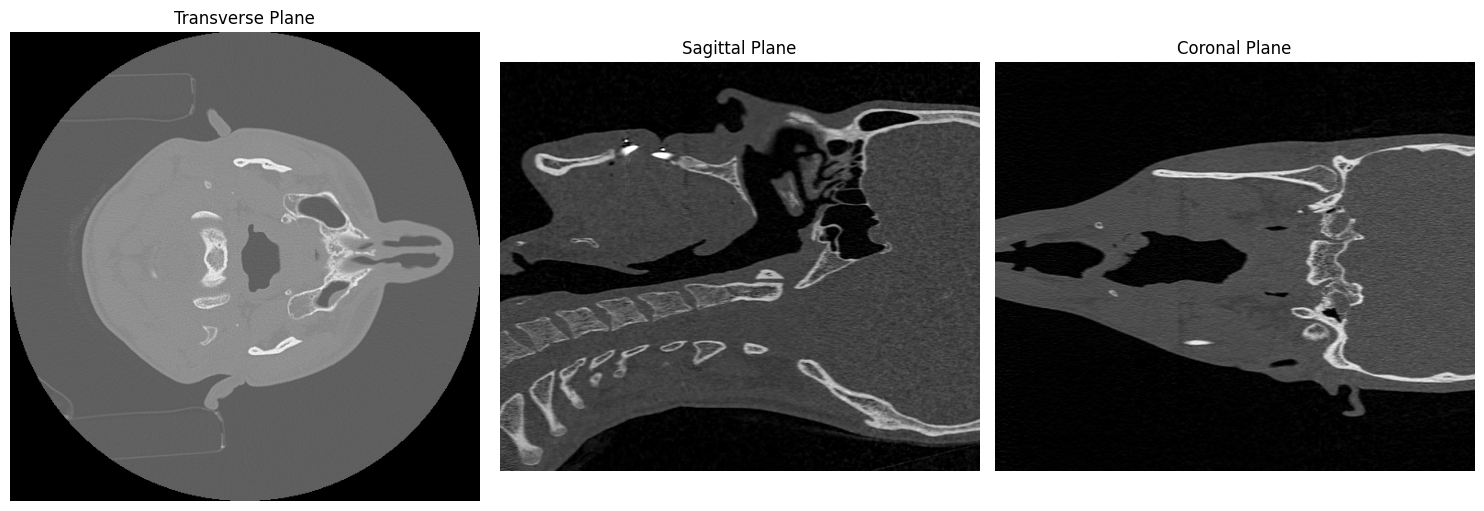

In [ ]:
# Load the NIfTI image
wm_nifti_path = '/content/CT_Daten/Case_WM_Converted/IMAGES_2.5_KIEFER_NNH_KNOCHERN_X_20190117083738_2.nii.gz'  # Choose an appropriate file
wm_img = nib.load(wm_nifti_path)
wm_nifti_data = wm_img.get_fdata()

# Check the shape of the data
print(f"Shape of WM NIfTI data: {wm_nifti_data.shape}")

# Create subplots for each plane
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Transverse Plane
axs[0].imshow(wm_nifti_data[:, :, int(wm_nifti_data.shape[2] / 2)], cmap='gray', origin='lower')  # Middle slice
axs[0].set_title('Transverse Plane')
axs[0].axis('off')

# Sagittal Plane
axs[1].imshow(wm_nifti_data[int(wm_nifti_data.shape[0] / 2), :, :], cmap='gray', origin='lower')  # Middle slice
axs[1].set_title('Sagittal Plane')
axs[1].axis('off')
# Coronal Plane
axs[2].imshow(wm_nifti_data[:, int(wm_nifti_data.shape[1] / 2), :], cmap='gray', origin='lower')  # Middle slice
axs[2].set_title('Coronal Plane')
axs[2].axis('off')

plt.tight_layout()
plt.show()


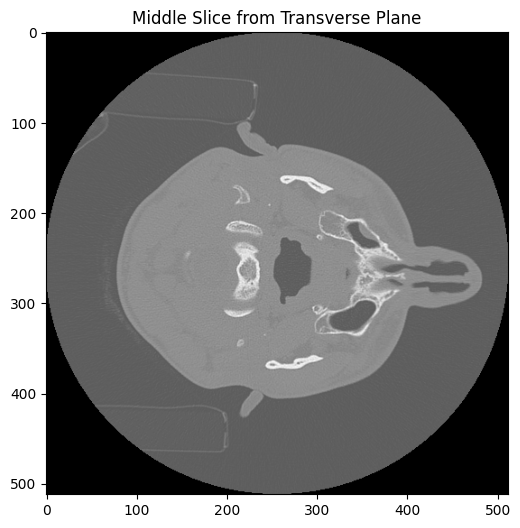

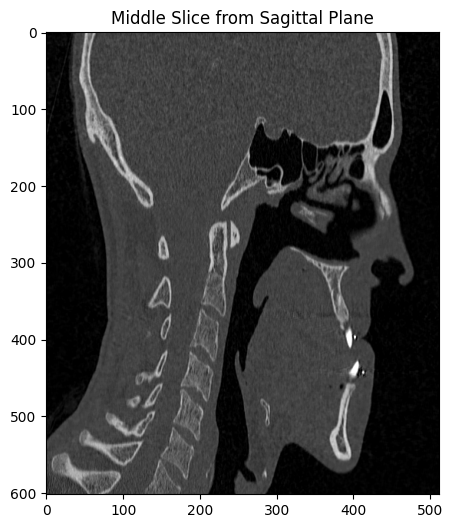

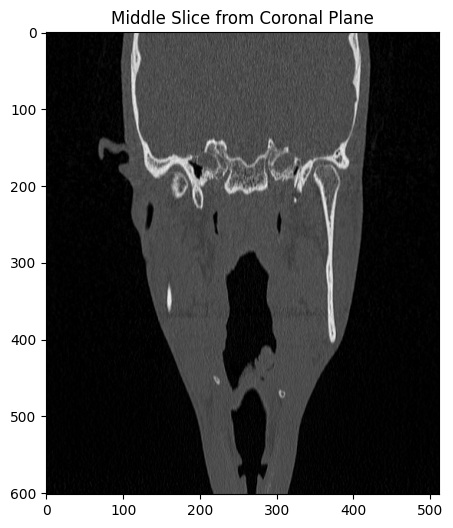

In [ ]:
import numpy as np

# Function to display middle slice for each plane
def display_middle_slices(nifti_data):
    # Get the middle slice index for each plane
    middle_x = nifti_data.shape[0] // 2  # Sagittal
    middle_y = nifti_data.shape[1] // 2  # Coronal
    middle_z = nifti_data.shape[2] // 2  # Axial (Transverse)

    # Transverse Plane (Axial)
    plt.figure(figsize=(6, 6))
    plt.imshow(nifti_data[:, :, middle_z], cmap='gray')
    plt.title('Middle Slice from Transverse Plane')
    plt.show()

    # Sagittal Plane
    plt.figure(figsize=(6, 6))
    plt.imshow(np.rot90(nifti_data[middle_x, :, :]), cmap='gray')
    plt.title('Middle Slice from Sagittal Plane')
    plt.show()

    # Coronal Plane
    plt.figure(figsize=(6, 6))
    plt.imshow(np.rot90(nifti_data[:, middle_y, :]), cmap='gray')
    plt.title('Middle Slice from Coronal Plane')
    plt.show()

# Assuming wm_nifti_data is already loaded from the NIfTI file
display_middle_slices(wm_nifti_data)


Shape of WM NIfTI data: (512, 512, 602)

The NIfTI volume has a shape of 512 x 512 x 602, representing the pixel resolution in the X and Y planes (512 x 512 pixels) and 602 slices along the Z-axis (depth).

The X and Y dimensions define the width and height of each 2D slice, while the 602 slices constitute the full 3D volume.

##**2.COORDINATES/LANDMARKS PLOTTING**

##1. CASE RS

In [ ]:
# Load the NIfTI file for Case RS
nifti_file_path = '/content/CT_Daten/Case_RS_Converted/IMAGES_2.4_NNH_+_Kiefer_NNH_metall_(helical)_Strecke_160mm_20220323150818_301b.nii.gz'
nifti_img = nib.load(nifti_file_path)

# Get the NIfTI data as a NumPy array
nifti_data = nifti_img.get_fdata()

# Check the shape of the data
print(f"Shape of the NIfTI image: {nifti_data.shape}")


Shape of the NIfTI image: (512, 512, 297)


In [ ]:
import pandas as pd

# Load the Excel file that contains the coordinates
file_path = '/content/drive/My Drive/Points and definitions.xlsx'
xls = pd.ExcelFile(file_path)

# Load the "Case RS" sheet with the coordinates
rs_coords_df = pd.read_excel(xls, sheet_name='Case RS')

# Display the first few rows to verify the data
rs_coords_df.head()


label  transversal  sagittal  vertikal
0            A      6.86059   75.4861  -91.7703
1   Ai1 (left)     -4.12234   67.8607 -150.6980
2  Ai1 (right)      1.68890   68.3642 -149.8320
3   Ant (left)    -41.96870   20.5147 -124.2820
4  Ant (right)     47.19530   23.3367 -127.2230

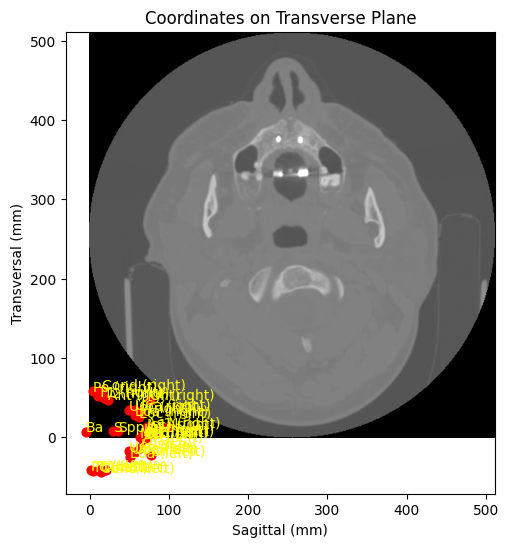

In [ ]:
# Choose the middle slice for transverse (axial) plane
transverse_slice_idx = nifti_data.shape[2] // 2
transverse_slice = nifti_data[:, :, transverse_slice_idx]

# Plot the transverse slice
plt.figure(figsize=(6, 6))
plt.imshow(transverse_slice.T, cmap='gray', origin='lower')

# Plot coordinates on the transverse slice
plt.scatter(rs_coords_df['sagittal'], rs_coords_df['transversal'], color='red', s=40)

# Add labels to the points
for idx, row in rs_coords_df.iterrows():
    plt.text(row['sagittal'], row['transversal'], row['label'], color='yellow')

plt.title('Coordinates on Transverse Plane')
plt.xlabel('Sagittal (mm)')
plt.ylabel('Transversal (mm)')
plt.show()


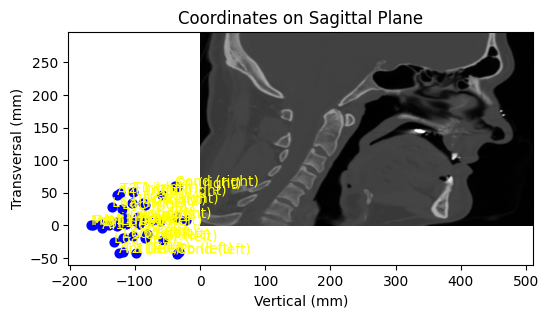

In [ ]:
# Choose the middle slice for sagittal plane
sagittal_slice_idx = nifti_data.shape[0] // 2
sagittal_slice = nifti_data[sagittal_slice_idx, :, :]

# Plot the sagittal slice
plt.figure(figsize=(6, 6))
plt.imshow(sagittal_slice.T, cmap='gray', origin='lower')

# Plot coordinates on the sagittal slice
plt.scatter(rs_coords_df['vertikal'], rs_coords_df['transversal'], color='blue', s=40)

# Add labels to the points
for idx, row in rs_coords_df.iterrows():
    plt.text(row['vertikal'], row['transversal'], row['label'], color='yellow')

plt.title('Coordinates on Sagittal Plane')
plt.xlabel('Vertical (mm)')
plt.ylabel('Transversal (mm)')
plt.show()


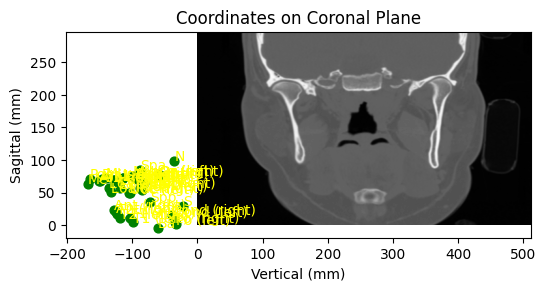

In [ ]:
# Choose the middle slice for coronal plane
coronal_slice_idx = nifti_data.shape[1] // 2
coronal_slice = nifti_data[:, coronal_slice_idx, :]

# Plot the coronal slice
plt.figure(figsize=(6, 6))
plt.imshow(coronal_slice.T, cmap='gray', origin='lower')

# Plot coordinates on the coronal/vertical slice
plt.scatter(rs_coords_df['vertikal'], rs_coords_df['sagittal'], color='green', s=40)

# Add labels to the points
for idx, row in rs_coords_df.iterrows():
    plt.text(row['vertikal'], row['sagittal'], row['label'], color='yellow')

plt.title('Coordinates on Coronal Plane')
plt.xlabel('Vertical (mm)')
plt.ylabel('Sagittal (mm)')
plt.show()


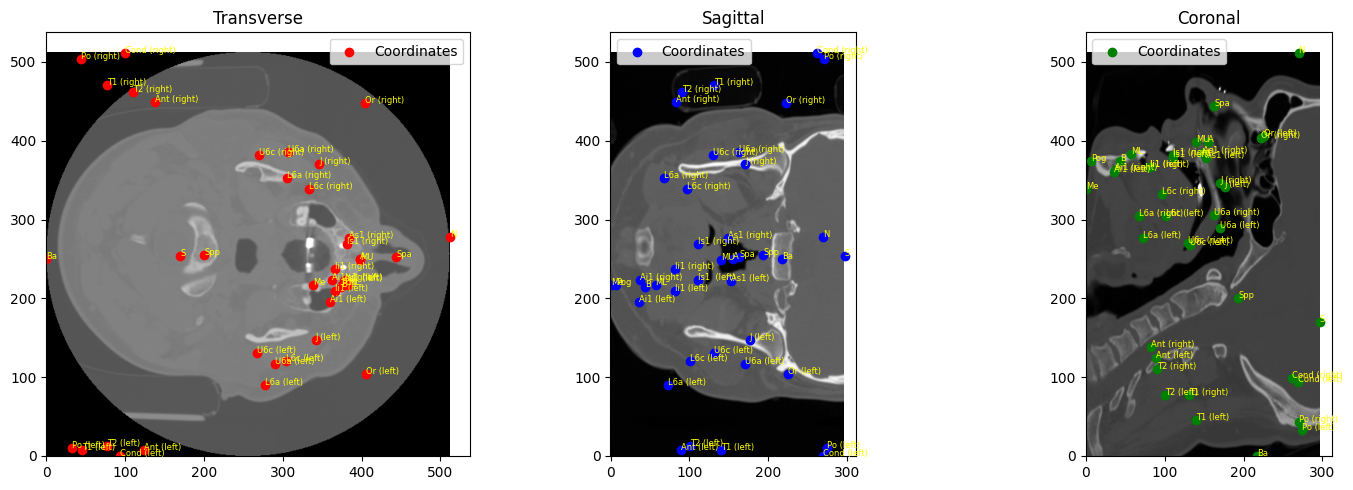

In [ ]:
#APPLY NORMALIZATION

# Min-Max Normalization
def normalize_coordinates(df, max_shape):
    df['transversal_normalized'] = ((df['transversal'] - df['transversal'].min()) /
                                     (df['transversal'].max() - df['transversal'].min())) * max_shape[0]

    df['sagittal_normalized'] = ((df['sagittal'] - df['sagittal'].min()) /
                                  (df['sagittal'].max() - df['sagittal'].min())) * max_shape[1]

    df['vertical_normalized'] = ((df['vertikal'] - df['vertikal'].min()) /
                                  (df['vertikal'].max() - df['vertikal'].min())) * max_shape[2]

# Image shape (for normalization)
image_shape = nifti_data.shape  # Should return (512, 512, 297)

# Normalize coordinates
normalize_coordinates(rs_coords_df, image_shape)

# Plotting the coordinates
def plot_coordinates(nifti_data, coords_df, title, ax, view):
    if view == 'transverse':
        ax.imshow(nifti_data[:, :, int(nifti_data.shape[2] / 2)], cmap='gray', origin='lower')  # Transverse
        ax.scatter(coords_df['sagittal_normalized'], coords_df['transversal_normalized'], color='red', label='Coordinates')
        for i in range(len(coords_df)):
            ax.text(coords_df['sagittal_normalized'][i], coords_df['transversal_normalized'][i], coords_df['label'][i], fontsize=6, color='yellow')
    elif view == 'sagittal':
        ax.imshow(nifti_data[:, int(nifti_data.shape[1] / 2), :], cmap='gray', origin='lower')  # Sagittal
        ax.scatter(coords_df['vertical_normalized'], coords_df['transversal_normalized'], color='blue', label='Coordinates')
        for i in range(len(coords_df)):
            ax.text(coords_df['vertical_normalized'][i], coords_df['transversal_normalized'][i], coords_df['label'][i], fontsize=6, color='yellow')
    elif view == 'coronal':
        ax.imshow(nifti_data[int(nifti_data.shape[0] / 2), :, :], cmap='gray', origin='lower')  # Coronal
        ax.scatter(coords_df['vertical_normalized'], coords_df['sagittal_normalized'], color='green', label='Coordinates')
        for i in range(len(coords_df)):
            ax.text(coords_df['vertical_normalized'][i], coords_df['sagittal_normalized'][i], coords_df['label'][i], fontsize=6, color='yellow')

    ax.set_title(title)
    ax.axis('on')
    ax.legend()

# Create subplots for each plane
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Transverse Plane
plot_coordinates(nifti_data, rs_coords_df, 'Transverse', axs[0], 'transverse')

# Sagittal Plane
plot_coordinates(nifti_data, rs_coords_df, 'Sagittal', axs[1], 'sagittal')

# Coronal Plane
plot_coordinates(nifti_data, rs_coords_df, 'Coronal', axs[2], 'coronal')

plt.tight_layout()
plt.show()


First, coordinates were outside the images dimensions. Min Max Normalization was applied but even though the coordinates are now inside the size of the images, they still not fall on the right anatomical landmarks.

In [ ]:
# Load the NIfTI image for Case RS
nifti_file_path = '/content/CT_Daten/Case_RS_Converted/IMAGES_2.4_NNH_+_Kiefer_NNH_metall_(helical)_Strecke_160mm_20220323150818_301b.nii.gz'
nifti_image = nib.load(nifti_file_path)

# Extract the affine matrix
affine_matrix = nifti_image.affine
print("Affine Matrix:\n", affine_matrix)



Affine Matrix:
 [[  -0.44140601   -0.            0.          119.90499878]
 [   0.            0.44140601    0.          -97.98647308]
 [   0.            0.            0.625      -175.65200806]
 [   0.            0.            0.            1.        ]]


In [ ]:

coords_homogeneous = np.column_stack([rs_coords_df[['sagittal_normalized', 'transversal_normalized', 'vertical_normalized']].values, np.ones(len(rs_coords_df))])

# Apply the affine transformation (dot product with the affine matrix)
transformed_coords = coords_homogeneous.dot(affine_matrix.T)

# Extract the transformed x, y, z coordinates
rs_coords_df['transformed_x'] = transformed_coords[:, 0]
rs_coords_df['transformed_y'] = transformed_coords[:, 1]
rs_coords_df['transformed_z'] = transformed_coords[:, 2]

# Preview the transformed coordinates
print(rs_coords_df[['transformed_x', 'transformed_y', 'transformed_z']].head())




   transformed_x  transformed_y  transformed_z
0     -55.746048      12.074652     -78.702366
1     -38.967065     -11.896940    -153.492148
2     -40.074970       0.786804    -152.393039
3      65.213401     -94.501261    -119.965523
4      59.003852     100.110102    -123.698178


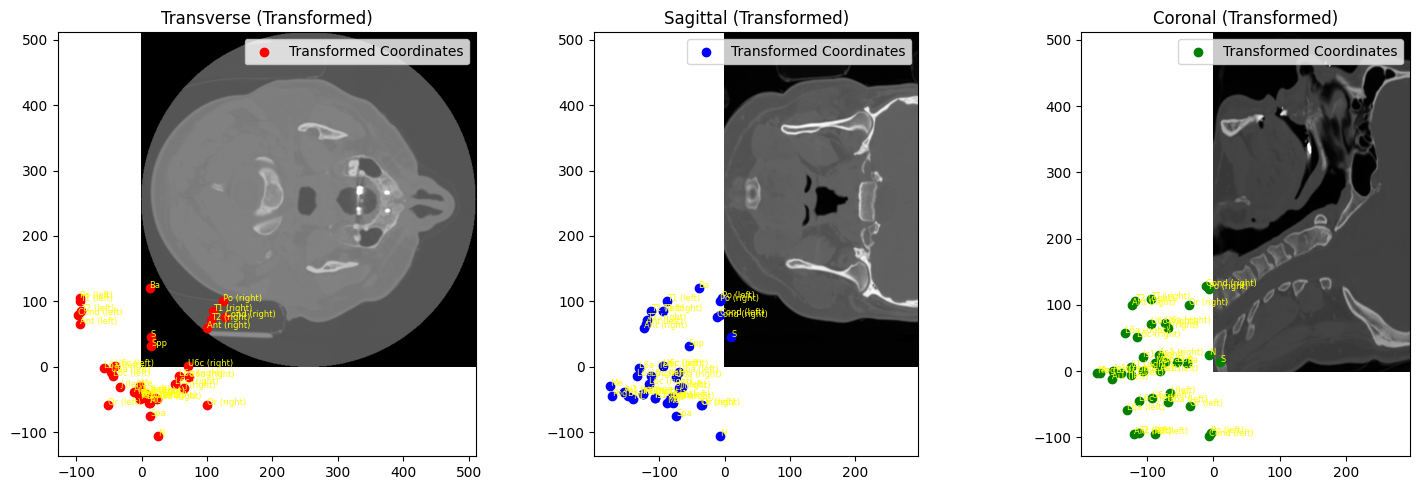

In [ ]:
# Function to plot transformed coordinates
def plot_transformed_coordinates(nifti_data, coords_df, title, ax, view):
    if view == 'transverse':
        ax.imshow(nifti_data[:, :, int(nifti_data.shape[2] / 2)], cmap='gray', origin='lower')  # Transverse
        ax.scatter(coords_df['transformed_y'], coords_df['transformed_x'], color='red', label='Transformed Coordinates')
        for i in range(len(coords_df)):
            ax.text(coords_df['transformed_y'][i], coords_df['transformed_x'][i], coords_df['label'][i], fontsize=6, color='yellow')
    elif view == 'sagittal':
        ax.imshow(nifti_data[:, int(nifti_data.shape[1] / 2), :], cmap='gray', origin='lower')  # Sagittal
        ax.scatter(coords_df['transformed_z'], coords_df['transformed_x'], color='blue', label='Transformed Coordinates')
        for i in range(len(coords_df)):
            ax.text(coords_df['transformed_z'][i], coords_df['transformed_x'][i], coords_df['label'][i], fontsize=6, color='yellow')
    elif view == 'coronal':
        ax.imshow(nifti_data[int(nifti_data.shape[0] / 2), :, :], cmap='gray', origin='lower')  # Coronal
        ax.scatter(coords_df['transformed_z'], coords_df['transformed_y'], color='green', label='Transformed Coordinates')
        for i in range(len(coords_df)):
            ax.text(coords_df['transformed_z'][i], coords_df['transformed_y'][i], coords_df['label'][i], fontsize=6, color='yellow')

    ax.set_title(title)
    ax.axis('on')
    ax.legend()

# Create subplots for each plane
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Transverse Plane
plot_transformed_coordinates(nifti_data, rs_coords_df, 'Transverse (Transformed)', axs[0], 'transverse')

# Sagittal Plane
plot_transformed_coordinates(nifti_data, rs_coords_df, 'Sagittal (Transformed)', axs[1], 'sagittal')

# Coronal Plane
plot_transformed_coordinates(nifti_data, rs_coords_df, 'Coronal (Transformed)', axs[2], 'coronal')

plt.tight_layout()
plt.show()


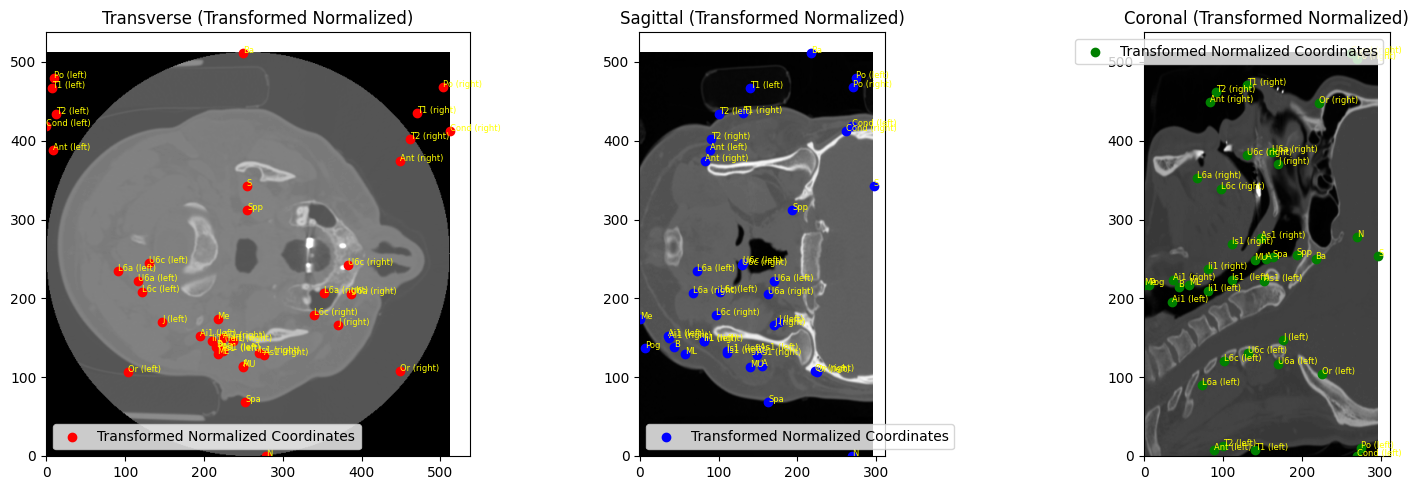

In [ ]:
# Normalize the transformed coordinates to the image dimensions
def normalize_transformed_coordinates(coords_df, image_shape):
    coords_df['transformed_x_normalized'] = ((coords_df['transformed_x'] - coords_df['transformed_x'].min()) /
                                              (coords_df['transformed_x'].max() - coords_df['transformed_x'].min())) * image_shape[0]

    coords_df['transformed_y_normalized'] = ((coords_df['transformed_y'] - coords_df['transformed_y'].min()) /
                                              (coords_df['transformed_y'].max() - coords_df['transformed_y'].min())) * image_shape[1]

    coords_df['transformed_z_normalized'] = ((coords_df['transformed_z'] - coords_df['transformed_z'].min()) /
                                              (coords_df['transformed_z'].max() - coords_df['transformed_z'].min())) * image_shape[2]

# Apply normalization
normalize_transformed_coordinates(rs_coords_df, nifti_data.shape)

# Plotting function to visualize normalized transformed coordinates
def plot_normalized_transformed_coordinates(nifti_data, coords_df, title, ax, view):
    if view == 'transverse':
        ax.imshow(nifti_data[:, :, int(nifti_data.shape[2] / 2)], cmap='gray', origin='lower')
        ax.scatter(coords_df['transformed_y_normalized'], coords_df['transformed_x_normalized'], color='red', label='Transformed Normalized Coordinates')
        for i in range(len(coords_df)):
            ax.text(coords_df['transformed_y_normalized'][i], coords_df['transformed_x_normalized'][i], coords_df['label'][i], fontsize=6, color='yellow')
    elif view == 'sagittal':
        ax.imshow(nifti_data[:, int(nifti_data.shape[1] / 2), :], cmap='gray', origin='lower')
        ax.scatter(coords_df['transformed_z_normalized'], coords_df['transformed_x_normalized'], color='blue', label='Transformed Normalized Coordinates')
        for i in range(len(coords_df)):
            ax.text(coords_df['transformed_z_normalized'][i], coords_df['transformed_x_normalized'][i], coords_df['label'][i], fontsize=6, color='yellow')
    elif view == 'coronal':
        ax.imshow(nifti_data[int(nifti_data.shape[0] / 2), :, :], cmap='gray', origin='lower')
        ax.scatter(coords_df['transformed_z_normalized'], coords_df['transformed_y_normalized'], color='green', label='Transformed Normalized Coordinates')
        for i in range(len(coords_df)):
            ax.text(coords_df['transformed_z_normalized'][i], coords_df['transformed_y_normalized'][i], coords_df['label'][i], fontsize=6, color='yellow')

    ax.set_title(title)
    ax.axis('on')
    ax.legend()

# Create subplots for each plane
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Transverse Plane
plot_normalized_transformed_coordinates(nifti_data, rs_coords_df, 'Transverse (Transformed Normalized)', axs[0], 'transverse')

# Sagittal Plane
plot_normalized_transformed_coordinates(nifti_data, rs_coords_df, 'Sagittal (Transformed Normalized)', axs[1], 'sagittal')

# Coronal Plane
plot_normalized_transformed_coordinates(nifti_data, rs_coords_df, 'Coronal (Transformed Normalized)', axs[2], 'coronal')

plt.tight_layout()
plt.show()


- **Dataset**:
  - Used a dataset of **41 landmarks**, each having **X (transversal), Y (sagittal), Z (vertical)** coordinates for plotting on 3D medical images.
  
- **Initial Plotting**:
  - Coordinates were plotted directly on the **NIfTI image** (shape: 512x512x297), but landmarks did not align well with the anatomical structures. This was due to spatial misalignment.

- **Normalization Applied**:
  - Min-max normalization was applied to scale the coordinates within the image dimensions (512x512x297) to ensure they fit inside the image slices.

- **Affine Matrix Applied**:
  - An **affine matrix** was used to adjust for **spatial transformations** and align the coordinates more accurately. The affine matrix helps correct spatial reference mismatches in 3D volumes, accounting for translations and rotations in medical imaging.

- **Plotting with Affine + Normalization**:
  - After applying the affine matrix and normalization, coordinates were plotted again, leading to better alignment but **some misalignment issues still remained**, particularly due to voxel spacing inconsistencies and reference frame mismatch.

- **Remaining Issues**:
  - **Voxel spacing inconsistencies** and **incorrect slice orientations** led to some landmarks still being off, indicating the need for further refinement in spatial calibration or using different correction techniques.

- **Usability of Coordinate System**:
  - The coordinate system allowed effective mapping within the image dimensions, enabling visualization of anatomical landmarks.
  
- **Normalization Process**:
  - Min-max normalization ensured coordinates fell within the image boundaries, supporting usable anatomical mapping.

- **Observed Misalignments**:
  - Slight misalignments in plotted coordinates were noted, likely due to voxel dimension inconsistencies or orientation discrepancies.

- **Conclusion**:
  - The system was functional but could benefit from further refinements to improve accuracy and enhance anatomical precision for clinical and research applications.

##2. WM COORDINATES

In [ ]:
# Load the NIfTI file for Case WM
nifti_file_path = '/content/CT_Daten/Case_WM_Converted/IMAGES_2.5_KIEFER_NNH_KNOCHERN_X_20190117083738_2.nii.gz'
nifti_img = nib.load(nifti_file_path)

# Get the NIfTI data as a NumPy array
nifti_data = nifti_img.get_fdata()

# Check the shape of the data
print(f"Shape of the NIfTI image: {nifti_data.shape}")


Shape of the NIfTI image: (512, 512, 602)


In [ ]:
# Load the Excel file that contains the coordinates
file_path = '/content/drive/My Drive/Points and definitions.xlsx'
xls = pd.ExcelFile(file_path)

# Load the "WK" sheet with the coordinates
wm_coords_df = pd.read_excel(xls, sheet_name='Case WK')

# Display the first few rows to verify the data
print(wm_coords_df.head())


         label  transversal  sagittal  vertikal
0            A     -6.05184   79.0008  -53.9206
1   Ai1 (left)    -12.13710   78.0423 -101.8990
2  Ai1 (right)     -8.64928   78.5032 -102.8950
3   Ant (left)    -51.14570   26.3486  -84.3108
4  Ant (right)     40.17230   35.0707  -84.6822


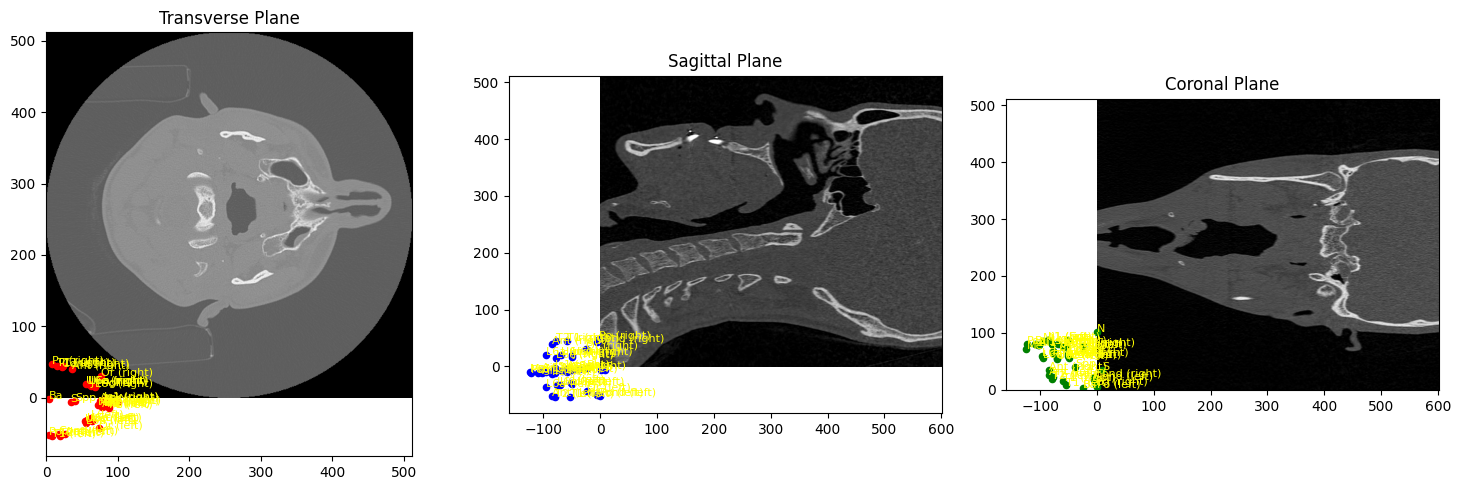

In [ ]:

# Plotting the coordinates on the NIfTI image
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Transverse Plane
axs[0].imshow(nifti_data[:, :, int(nifti_data.shape[2] / 2)], cmap='gray', origin='lower')
axs[0].scatter(wm_coords_df['sagittal'], wm_coords_df['transversal'], color='red', s=20, label='Coordinates')
for i in range(len(wm_coords_df)):
    axs[0].text(wm_coords_df['sagittal'].iloc[i], wm_coords_df['transversal'].iloc[i], wm_coords_df['label'].iloc[i], fontsize=8, color='yellow')
axs[0].set_title('Transverse Plane')
axs[0].axis('on')

# Sagittal Plane
axs[1].imshow(nifti_data[int(nifti_data.shape[0] / 2), :, :], cmap='gray', origin='lower')
axs[1].scatter(wm_coords_df['vertikal'], wm_coords_df['transversal'], color='blue', s=20, label='Coordinates')
for i in range(len(wm_coords_df)):
    axs[1].text(wm_coords_df['vertikal'].iloc[i], wm_coords_df['transversal'].iloc[i], wm_coords_df['label'].iloc[i], fontsize=8, color='yellow')
axs[1].set_title('Sagittal Plane')
axs[1].axis('on')

# Coronal Plane
axs[2].imshow(nifti_data[:, int(nifti_data.shape[1] / 2), :], cmap='gray', origin='lower')
axs[2].scatter(wm_coords_df['vertikal'], wm_coords_df['sagittal'], color='green', s=20, label='Coordinates')
for i in range(len(wm_coords_df)):
    axs[2].text(wm_coords_df['vertikal'].iloc[i], wm_coords_df['sagittal'].iloc[i], wm_coords_df['label'].iloc[i], fontsize=8, color='yellow')
axs[2].set_title('Coronal Plane')
axs[2].axis('on')

plt.tight_layout()
plt.show()


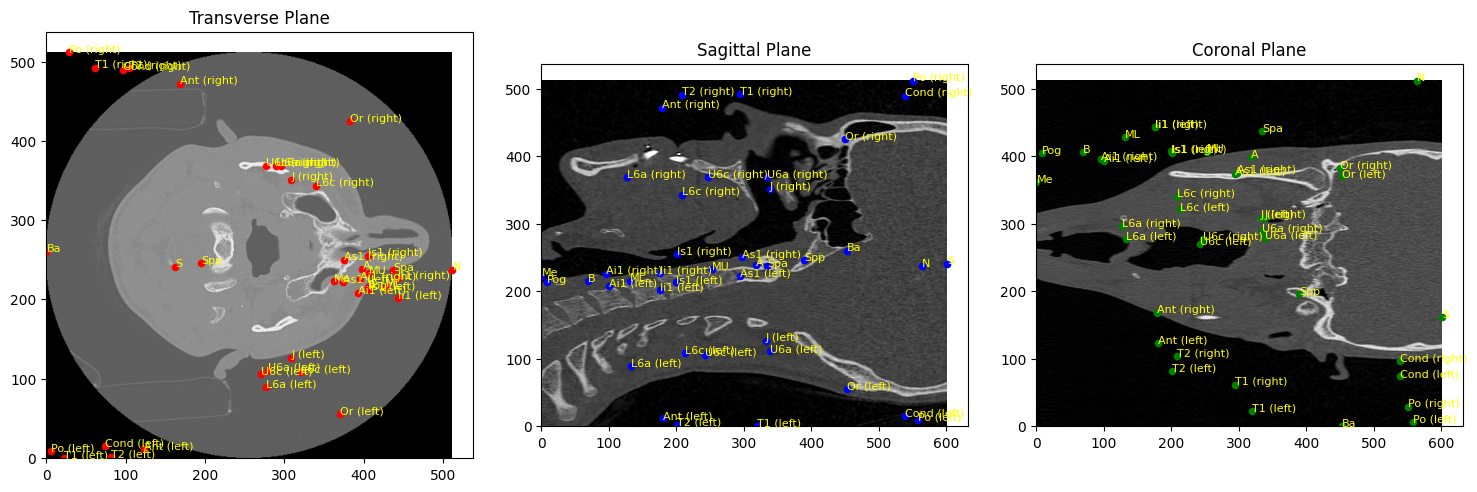

In [ ]:

# Normalization Function
def normalize_coordinates(df, max_shape):
    df['transversal_normalized'] = ((df['transversal'] - df['transversal'].min()) /
                                     (df['transversal'].max() - df['transversal'].min())) * max_shape[0]

    df['sagittal_normalized'] = ((df['sagittal'] - df['sagittal'].min()) /
                                  (df['sagittal'].max() - df['sagittal'].min())) * max_shape[1]

    df['vertical_normalized'] = ((df['vertikal'] - df['vertikal'].min()) /
                                  (df['vertikal'].max() - df['vertikal'].min())) * max_shape[2]

# Normalize the coordinates
normalize_coordinates(wm_coords_df, nifti_data.shape)

# Plotting the coordinates on the NIfTI image
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Transverse Plane
axs[0].imshow(nifti_data[:, :, int(nifti_data.shape[2] / 2)], cmap='gray', origin='lower')
axs[0].scatter(wm_coords_df['sagittal_normalized'], wm_coords_df['transversal_normalized'], color='red', s=20, label='Coordinates')
for i in range(len(wm_coords_df)):
    axs[0].text(wm_coords_df['sagittal_normalized'].iloc[i], wm_coords_df['transversal_normalized'].iloc[i], wm_coords_df['label'].iloc[i], fontsize=8, color='yellow')
axs[0].set_title('Transverse Plane')
axs[0].axis('on')

# Sagittal Plane
axs[1].imshow(nifti_data[int(nifti_data.shape[0] / 2), :, :], cmap='gray', origin='lower')
axs[1].scatter(wm_coords_df['vertical_normalized'], wm_coords_df['transversal_normalized'], color='blue', s=20, label='Coordinates')
for i in range(len(wm_coords_df)):
    axs[1].text(wm_coords_df['vertical_normalized'].iloc[i], wm_coords_df['transversal_normalized'].iloc[i], wm_coords_df['label'].iloc[i], fontsize=8, color='yellow')
axs[1].set_title('Sagittal Plane')
axs[1].axis('on')

# Coronal Plane
axs[2].imshow(nifti_data[:, int(nifti_data.shape[1] / 2), :], cmap='gray', origin='lower')
axs[2].scatter(wm_coords_df['vertical_normalized'], wm_coords_df['sagittal_normalized'], color='green', s=20, label='Coordinates')
for i in range(len(wm_coords_df)):
    axs[2].text(wm_coords_df['vertical_normalized'].iloc[i], wm_coords_df['sagittal_normalized'].iloc[i], wm_coords_df['label'].iloc[i], fontsize=8, color='yellow')
axs[2].set_title('Coronal Plane')
axs[2].axis('on')

plt.tight_layout()
plt.show()


Min Max normalization has improved the positioning of the coordinates/landmarks as they are inside the dimensions of the images. But the landmarks are not still falling on their correct anatomical positions. Affine Matrix to be applied

In [ ]:

wm_nifti_file = '/content/CT_Daten/Case_WM_Converted/IMAGES_2.5_KIEFER_NNH_KNOCHERN_X_20190117083738_2.nii.gz'
wm_nifti_image = nib.load(wm_nifti_file)

# Get the affine matrix
wm_affine_matrix = wm_nifti_image.affine
print("Affine Matrix for Case WM:")
print(wm_affine_matrix)


Affine Matrix for Case WM:
[[  -0.46093801   -0.            0.          118.        ]
 [   0.            0.46093801    0.         -102.33932495]
 [   0.            0.            0.31200027 -138.51216125]
 [   0.            0.            0.            1.        ]]


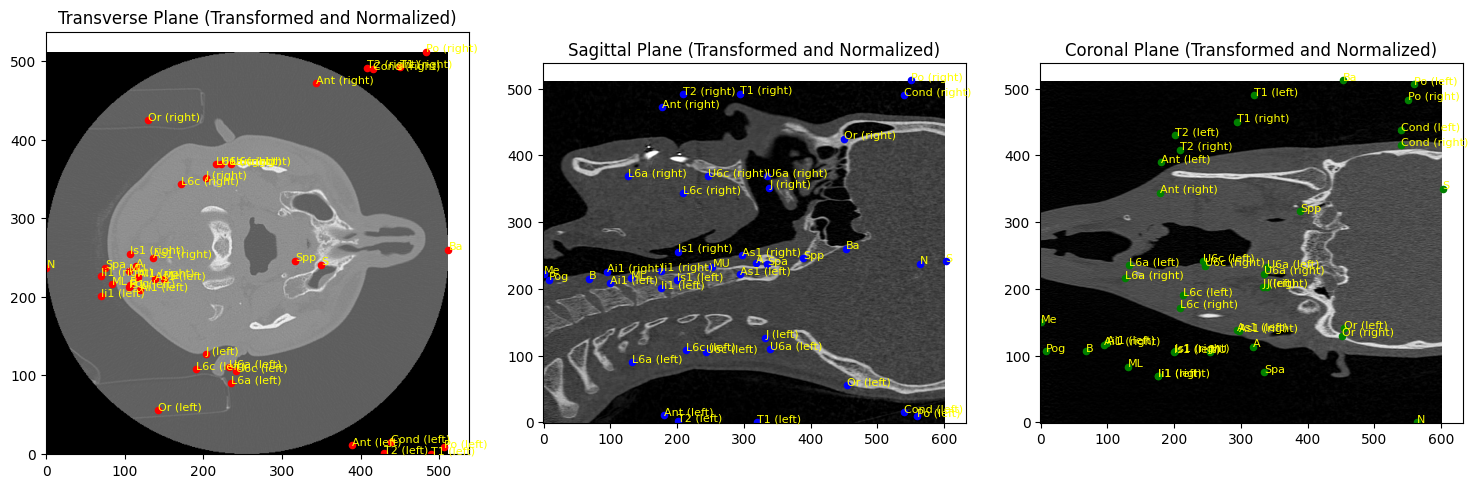

In [ ]:
# Load the NIfTI file for Case WM
nifti_file_path = '/content/CT_Daten/Case_WM_Converted/IMAGES_2.5_KIEFER_NNH_KNOCHERN_X_20190117083738_2.nii.gz'
nifti_img = nib.load(nifti_file_path)
nifti_data = nifti_img.get_fdata()

# Load the coordinates from the WK sheet
file_path = '/content/drive/My Drive/Points and definitions.xlsx'
xls = pd.ExcelFile(file_path)
wm_coords_df = pd.read_excel(xls, sheet_name='Case WK')

# Apply affine transformation to the coordinates
def apply_affine_to_coordinates(coords_df, affine_matrix):

    coords_homogeneous = np.ones((len(coords_df), 4))
    coords_homogeneous[:, 0] = coords_df['sagittal']  # Original sagittal coordinates
    coords_homogeneous[:, 1] = coords_df['transversal']  # Original transversal coordinates
    coords_homogeneous[:, 2] = coords_df['vertikal']  # Original vertical coordinates

    # Apply affine transformation
    transformed_coords = affine_matrix.dot(coords_homogeneous.T).T

    # Extract transformed coordinates
    coords_df['transformed_sagittal'] = transformed_coords[:, 0]
    coords_df['transformed_transversal'] = transformed_coords[:, 1]
    coords_df['transformed_vertical'] = transformed_coords[:, 2]

# Apply the affine transformation
apply_affine_to_coordinates(wm_coords_df, wm_affine_matrix)

# Normalization Function (apply after affine transformation)
def normalize_coordinates(df, max_shape):
    df['transformed_sagittal_normalized'] = ((df['transformed_sagittal'] - df['transformed_sagittal'].min()) /
                                             (df['transformed_sagittal'].max() - df['transformed_sagittal'].min())) * max_shape[0]

    df['transformed_transversal_normalized'] = ((df['transformed_transversal'] - df['transformed_transversal'].min()) /
                                                (df['transformed_transversal'].max() - df['transformed_transversal'].min())) * max_shape[1]

    df['transformed_vertical_normalized'] = ((df['transformed_vertical'] - df['transformed_vertical'].min()) /
                                             (df['transformed_vertical'].max() - df['transformed_vertical'].min())) * max_shape[2]

# Apply normalization after affine transformation
normalize_coordinates(wm_coords_df, nifti_data.shape)

# Plotting the transformed and normalized coordinates on the NIfTI image
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Transverse Plane
axs[0].imshow(nifti_data[:, :, int(nifti_data.shape[2] / 2)], cmap='gray', origin='lower')
axs[0].scatter(wm_coords_df['transformed_sagittal_normalized'], wm_coords_df['transformed_transversal_normalized'], color='red', s=20, label='Transformed Normalized Coordinates')
for i in range(len(wm_coords_df)):
    axs[0].text(wm_coords_df['transformed_sagittal_normalized'].iloc[i], wm_coords_df['transformed_transversal_normalized'].iloc[i], wm_coords_df['label'].iloc[i], fontsize=8, color='yellow')
axs[0].set_title('Transverse Plane (Transformed and Normalized)')
axs[0].axis('on')

# Sagittal Plane
axs[1].imshow(nifti_data[int(nifti_data.shape[0] / 2), :, :], cmap='gray', origin='lower')
axs[1].scatter(wm_coords_df['transformed_vertical_normalized'], wm_coords_df['transformed_transversal_normalized'], color='blue', s=20, label='Transformed Normalized Coordinates')
for i in range(len(wm_coords_df)):
    axs[1].text(wm_coords_df['transformed_vertical_normalized'].iloc[i], wm_coords_df['transformed_transversal_normalized'].iloc[i], wm_coords_df['label'].iloc[i], fontsize=8, color='yellow')
axs[1].set_title('Sagittal Plane (Transformed and Normalized)')
axs[1].axis('on')

# Coronal Plane
axs[2].imshow(nifti_data[:, int(nifti_data.shape[1] / 2), :], cmap='gray', origin='lower')
axs[2].scatter(wm_coords_df['transformed_vertical_normalized'], wm_coords_df['transformed_sagittal_normalized'], color='green', s=20, label='Transformed Normalized Coordinates')
for i in range(len(wm_coords_df)):
    axs[2].text(wm_coords_df['transformed_vertical_normalized'].iloc[i], wm_coords_df['transformed_sagittal_normalized'].iloc[i], wm_coords_df['label'].iloc[i], fontsize=8, color='yellow')
axs[2].set_title('Coronal Plane (Transformed and Normalized)')
axs[2].axis('on')

plt.tight_layout()
plt.show()



- **Dataset**:
  - Used a dataset of **41 landmarks**, each with **X (transversal), Y (sagittal), Z (vertical)** coordinates for plotting on 3D medical images in **Case WM**.
  
- **Initial Plotting**:
  - Coordinates were plotted directly on the **NIfTI image** (shape: 512x512x602), but landmarks did not align well due to misalignment in spatial orientation and tilt variations across slices.

- **Normalization Applied**:
  - Min-max normalization was applied to scale the coordinates within the image dimensions (512x512x602) to ensure proper positioning of landmarks within the image slices.

- **Affine Matrix Applied**:
  - An **affine matrix** was used to correct for **spatial transformations** (translations and rotations). This adjustment aimed to improve the accuracy of the coordinate placement, aligning them better with the anatomical structures in 3D space.

- **Plotting with Affine + Normalization**:
  - After applying both normalization and the affine matrix, the landmarks aligned better with the images, but **issues persisted due to voxel spacing variations** and inconsistencies in slice orientations, affecting the overall precision.

- **Remaining Issues**:
  - **Gantry tilt differences** and **variable slice distances** in Case WM created challenges in fully aligning the landmarks with the image, leading to slight mismatches that still require further adjustments.

##**SUITABILITY AND ISSUES WITH THE COORDINATE SYSTEM**

### **Suitability of the Coordinate System:**
- **Normalization Success**: The min-max normalization allowed the coordinates to fit within the image dimensions for both **Case RS (512x512x297)** and **Case WM (512x512x602)**, ensuring they fell inside the visualized images.
- **Affine Transformation**: The use of the **affine matrix** helped account for spatial transformations, aligning the coordinates more accurately across slices and improving overall mapping in both cases.
- **Anatomical Context**: The system allowed for relatively effective placement of landmarks within the anatomical regions of interest, giving a usable basis for 3D mapping tasks.
- **Coordinate Predictability**: Once normalized and adjusted with the affine matrix, the coordinates were largely predictable, helping maintain usability in visualizing key landmarks.

### **Issues with the Coordinate System:**
- **Gantry Tilt Variations**: In both cases, **gantry tilt differences** across slices introduced inconsistencies in the alignment of coordinates with the image slices, leading to spatial distortions.
- **Voxel Spacing Inconsistencies**: **Inconsistent interslice distances** across images (particularly in Case RS) affected the accuracy of landmark placement, making it difficult to establish reliable 3D spatial relationships.
- **Missing Spatial Orientation Tags**: The **absence of spatial orientation tags** (0020,0037) in both datasets led to potential image flipping and misalignment when plotting coordinates, complicating precise 3D reconstructions.
- **Incomplete Conversion**: Partial file conversion in both cases (only a subset of DICOM files was converted) meant that some slices and coordinates were missing, potentially reducing the completeness of the 3D volume.
- **Residual Misalignments**: Despite normalization and affine adjustments, **reference frame mismatches** and voxel spacing variations meant that coordinates were still not perfectly aligned, requiring further refinement for accurate anatomical mapping.